In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
from citipy import citipy

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | ambon
Processing Record 4 of Set 1 | tsogni
Processing Record 5 of Set 1 | kibaha
Processing Record 6 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | souillac
Processing Record 9 of Set 1 | allahganj
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | zhigansk
Processing Record 13 of Set 1 | flin flon
Processing Record 14 of Set 1 | ribeira grande
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | ukiah
Processing Record 19 of Set 1 | lagoa
Processing Record 20 of Set 1 | brigantine
Processing Record 21 of Set 1 | mulbagal
Processing Record 22 of Set 1 | faanui
Processing Reco

Processing Record 35 of Set 4 | praia da vitoria
Processing Record 36 of Set 4 | lebu
Processing Record 37 of Set 4 | roald
Processing Record 38 of Set 4 | madang
Processing Record 39 of Set 4 | mutata
Processing Record 40 of Set 4 | constitucion
Processing Record 41 of Set 4 | iquitos
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | kilindoni
Processing Record 44 of Set 4 | amapa
Processing Record 45 of Set 4 | aklavik
Processing Record 46 of Set 4 | mar del plata
Processing Record 47 of Set 4 | westport
Processing Record 48 of Set 4 | ussel
Processing Record 49 of Set 4 | kargasok
Processing Record 50 of Set 4 | ingham
Processing Record 1 of Set 5 | launceston
Processing Record 2 of Set 5 | araouane
Processing Record 3 of Set 5 | mahebourg
Processing Record 4 of Set 5 | antsirabe
Processing Record 5 of Set 5 | saint-augustin
Processing Record 6 of Set 5 | sao geraldo do araguaia
Processing Record 7 of Set 5 | tumannyy
City not found. Skipping...
Processing R

Processing Record 26 of Set 8 | arlit
Processing Record 27 of Set 8 | maniitsoq
Processing Record 28 of Set 8 | sitka
Processing Record 29 of Set 8 | shubarshi
Processing Record 30 of Set 8 | tarauaca
Processing Record 31 of Set 8 | tagusao
Processing Record 32 of Set 8 | korla
Processing Record 33 of Set 8 | ambilobe
Processing Record 34 of Set 8 | champerico
Processing Record 35 of Set 8 | den helder
Processing Record 36 of Set 8 | huarmey
Processing Record 37 of Set 8 | velyka bilozerka
Processing Record 38 of Set 8 | hamilton
Processing Record 39 of Set 8 | bam
Processing Record 40 of Set 8 | atambua
Processing Record 41 of Set 8 | vardo
Processing Record 42 of Set 8 | ust-kuyga
Processing Record 43 of Set 8 | progreso
Processing Record 44 of Set 8 | bridlington
Processing Record 45 of Set 8 | kurchum
Processing Record 46 of Set 8 | corralillo
Processing Record 47 of Set 8 | bakchar
Processing Record 48 of Set 8 | borlange
City not found. Skipping...
Processing Record 49 of Set 8 |

Processing Record 13 of Set 12 | labuhan
Processing Record 14 of Set 12 | qaqortoq
Processing Record 15 of Set 12 | raudeberg
Processing Record 16 of Set 12 | huntington beach
Processing Record 17 of Set 12 | orsha
Processing Record 18 of Set 12 | talaya
Processing Record 19 of Set 12 | vaitape
Processing Record 20 of Set 12 | manica
Processing Record 21 of Set 12 | kibala
Processing Record 22 of Set 12 | meyungs
City not found. Skipping...
Processing Record 23 of Set 12 | virginia beach
Processing Record 24 of Set 12 | sarankhola
Processing Record 25 of Set 12 | seydi
Processing Record 26 of Set 12 | knyaginino
Processing Record 27 of Set 12 | darhan
Processing Record 28 of Set 12 | inirida
Processing Record 29 of Set 12 | troyes
Processing Record 30 of Set 12 | zuwarah
Processing Record 31 of Set 12 | san cristobal
Processing Record 32 of Set 12 | zeya
Processing Record 33 of Set 12 | baykit
Processing Record 34 of Set 12 | inverell
Processing Record 35 of Set 12 | fuerte olimpo
Proc

In [10]:
len(city_data)

554

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,73.56,33,20,3.44,CA,2022-08-14 00:37:53
1,Punta Arenas,-53.1500,-70.9167,37.51,87,75,14.97,CL,2022-08-14 00:39:49
2,Ambon,-3.6954,128.1814,82.54,78,75,5.75,ID,2022-08-14 00:39:49
3,Tsogni,-2.7942,10.0988,69.31,85,80,4.23,GA,2022-08-14 00:39:50
4,Kibaha,-6.7667,38.9167,68.52,96,42,2.75,TZ,2022-08-14 00:39:50
5,Codrington,-38.2667,141.9667,55.26,83,35,19.95,AU,2022-08-14 00:39:51
6,Souillac,-20.5167,57.5167,66.58,77,75,13.80,MU,2022-08-14 00:39:51
7,Allahganj,27.5500,79.6833,84.38,68,72,4.76,IN,2022-08-14 00:39:52
8,Ushuaia,-54.8000,-68.3000,37.06,70,75,13.80,AR,2022-08-14 00:39:52
9,Bredasdorp,-34.5322,20.0403,49.95,84,22,18.68,ZA,2022-08-14 00:39:52


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", 
                    "Lng", "Max Temp", "Humidity", "Cloudiness",
                   "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-08-14 00:37:53,55.7435,-97.8558,73.56,33,20,3.44
1,Punta Arenas,CL,2022-08-14 00:39:49,-53.1500,-70.9167,37.51,87,75,14.97
2,Ambon,ID,2022-08-14 00:39:49,-3.6954,128.1814,82.54,78,75,5.75
3,Tsogni,GA,2022-08-14 00:39:50,-2.7942,10.0988,69.31,85,80,4.23
4,Kibaha,TZ,2022-08-14 00:39:50,-6.7667,38.9167,68.52,96,42,2.75
5,Codrington,AU,2022-08-14 00:39:51,-38.2667,141.9667,55.26,83,35,19.95
6,Souillac,MU,2022-08-14 00:39:51,-20.5167,57.5167,66.58,77,75,13.80
7,Allahganj,IN,2022-08-14 00:39:52,27.5500,79.6833,84.38,68,72,4.76
8,Ushuaia,AR,2022-08-14 00:39:52,-54.8000,-68.3000,37.06,70,75,13.80
9,Bredasdorp,ZA,2022-08-14 00:39:52,-34.5322,20.0403,49.95,84,22,18.68


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

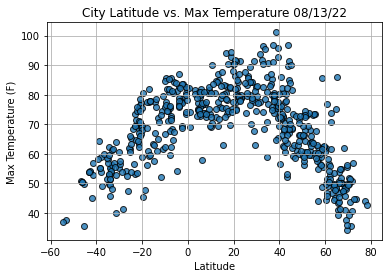

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

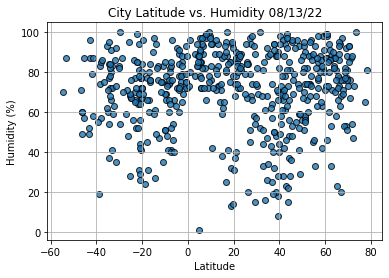

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

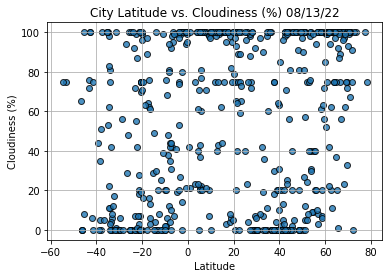

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

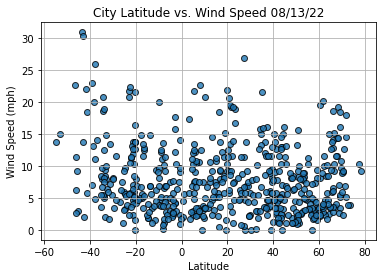

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=14, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-08-14 00:39:54
Lat                        -33.65
Lng                      115.3333
Max Temp                    55.36
Humidity                       66
Cloudiness                     42
Wind Speed                   2.04
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
549     True
550     True
551     True
552     True
553    False
Name: Lat, Length: 554, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-08-14 00:37:53,55.7435,-97.8558,73.56,33,20,3.44
7,Allahganj,IN,2022-08-14 00:39:52,27.5500,79.6833,84.38,68,72,4.76
10,Zhigansk,RU,2022-08-14 00:39:53,66.7697,123.3711,55.00,68,56,10.29
11,Flin Flon,CA,2022-08-14 00:34:55,54.7682,-101.8650,73.11,45,9,4.63
12,Ribeira Grande,PT,2022-08-14 00:39:53,38.5167,-28.7000,75.92,88,4,6.04


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

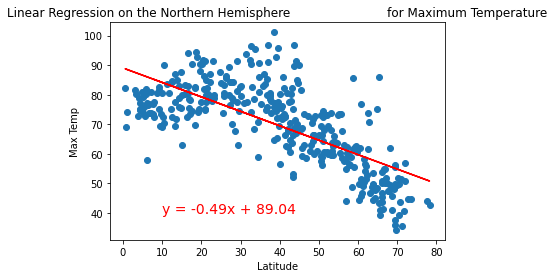

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

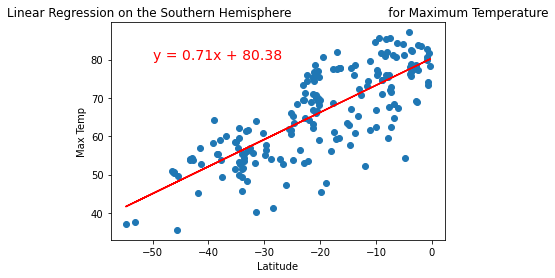

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

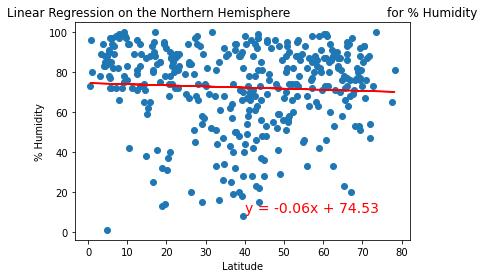

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

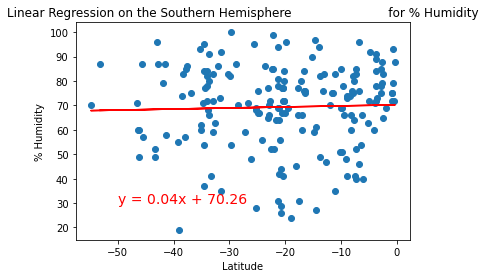

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,30))

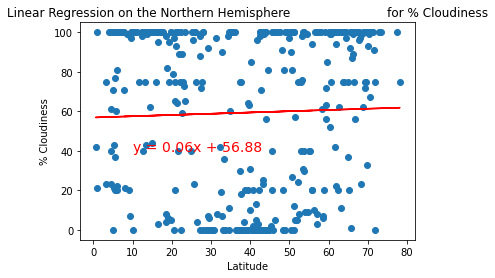

In [60]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

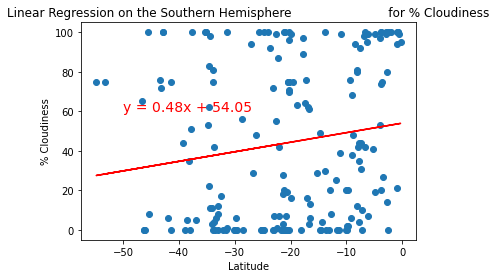

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

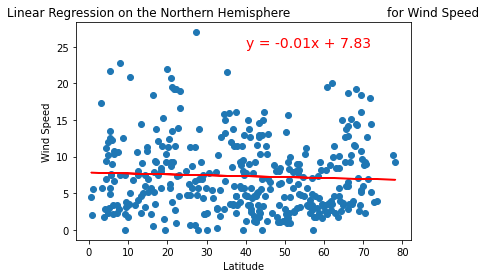

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

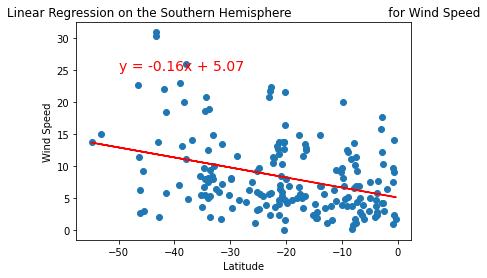

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))